We are interested in formulating output feedback controllers that use implicit surface representations to find control inputs.

Consider a known function $s$ which maps from $[-\frac{\theta_{FOV}}{2},\frac{\theta_{FOV}}{2}]$ to the distance of a UAV, where $S_{max}$ is the moving maximum sensing horizon of the sensor.

$$s: [-\frac{\theta_{FOV}}{2},\frac{\theta_{FOV}}{2}] \rightarrow [0,S_{max}] $$

The distance $s$ may also be thought of as the Euclidean distance from the $0$-level-set of the signed distance function (SDF).  A side-effect benefit of this approach is that we can naturally use implicit surface representations produced by fusion algorithms of depth sensor information (i.e. Kinect Fusion, etc.)

What we need to find is a geometric PDE somewhat of the form:

$$ \frac{\partial}{\partial t}  s(\theta)  = f(\psi, u(s))$$



Where $\psi$ is the yaw of the UAV and $u$ is some control input that may be calculated via a reactive controller, for example of the form:

$$ u = k_1\int w_1(\theta)s(\theta)d\theta + k_2\int w_s(\theta)s(\theta)d\theta$$

We need to use a finite dimensional space to approximate the function $s$.

Given some vector of basis functions $\mathbf{w}$ and vector of weights $\mathbf{c}$ we can approximate $s$ as:

$$ s(\theta) \approx c_1w_1(\theta) + c_2w_2(\theta) + ... + c_Nw_n(\theta) $$

Which then gives us a PDE that approximates $f$:

$$ \frac{\partial}{\partial t} s(\theta) \approx \dot{c}_1w_1(\theta) + \dot{c}_2w_2(\theta) + ... + \dot{c}_Nw_N(\theta) $$

$$ \approx f(\psi, u(s))$$

We can now instead think of $f$ as a vector $\mathbf{f}$ which is a function $\mathbf{f}(c_0,c_1,...,c_N,\theta,\dot{\psi)}$, and whose elements are $f_1, f_2, ..., f_N$.  Also write $\mathbf{c}$ as the vector $\mathbf{c} = (c_1,c_2,...,c_N)$.  We have 

$$ \frac{\partial}{\partial t} \mathbf{c} = \begin{pmatrix}
        f_1(\mathbf{c}, \dot{\psi}) \\
        f_2(\mathbf{c}, \dot{\psi}) \\
        \vdots \\
        f_N(\mathbf{c}, \dot{\psi}) \\
        \end{pmatrix} $$



In [13]:
import IPython.html.widgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import math

def plotPlane(theta_deg): 
    def plotObs(theta,ax):
        # Plot circle obstacle 2
        an = np.linspace(0,2*math.pi,100)
        r_circ = math.sqrt(5**2 + 12**2)
        print r_circ
        theta_0_circ = math.atan(-5.0/10.0)
        theta_rel_circ = theta + theta_0_circ
        print theta_rel_circ
        ax.plot(1*np.cos(an)+r_circ*math.sin(math.pi + theta_rel_circ), 1*np.sin(an) - r_circ*math.cos(math.pi + theta_rel_circ))

        # Plot circle obstacle 2
        an = np.linspace(0,2*math.pi,100)
        r_circ = math.sqrt(3**2 + 10**2)
        print r_circ
        theta_0_circ = math.atan(3.0/10.0)
        theta_rel_circ = theta + theta_0_circ
        print theta_rel_circ
        ax.plot(1*np.cos(an)+r_circ*math.sin(math.pi + theta_rel_circ), 1*np.sin(an) - r_circ*math.cos(math.pi + theta_rel_circ))

    fig, ax = plt.subplots()

    # Rotate for theta, measured as 0 true north
    theta = theta_deg*math.pi/180
    plotObs(theta,ax)

    def plotFOV(ax):
        FOVangle = 130*math.pi/180
        FOVlength = 10

        theta_neg = -FOVangle/2
        theta_pos = FOVangle/2

        ax.plot((0,FOVlength*math.cos(math.pi/2-theta_pos)),(0,FOVlength*math.sin(math.pi/2-theta_pos)),color='orange')
        ax.plot((0,FOVlength*math.cos(math.pi/2-theta_neg)),(0,FOVlength*math.sin(math.pi/2-theta_neg)),color='orange')



    ax.axis([-15, 15, -5, 20])

    im = plt.imread('tetrazeph.jpg')
    newax = fig.add_axes([0.477, 0.16, 0.07, 0.1], anchor='SW')
    newax.imshow(im)
    newax.axis('off')

    ax.set_aspect('equal', 'datalim')

    plotFOV(ax)

    plt.show()


13.0
-0.324021268841
10.4403065089
0.431083134637


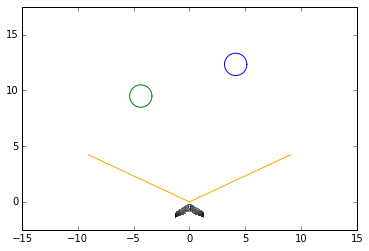

In [14]:
from planeVis import plotPlane
theta_slider = widgets.FloatSlider(min=-90, max=90, step=1, value=0)

w=widgets.interactive(plotPlane,theta_deg=theta_slider)
display(w)